## Supervised Machine Learning Model

In this chapter we are presenting logistic regression and support vector machine models to see to what degree we can associate given tweet with it being posted by a party from opposition or proposition.

In [2]:
import pandas as pd

In [18]:
df_filtered = pd.read_pickle('cleaned_data/df_filtered.pkl')

### Logistic regression model
Below, there are logistic regression models basing on the word embeddings prepared in chapter 5 of this analysis

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Preprocess the data
X = df_filtered['text_clean_en']
y = df_filtered['opposition_proposition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Sentence Transformers (precomputed)
X_train_st = np.array(df_filtered.loc[X_train.index, 'encode_transforemers'].tolist())
X_test_st = np.array(df_filtered.loc[X_test.index, 'encode_transforemers'].tolist())

# CLS_BERT (precomputed)
X_train_cls_bert = np.array(df_filtered.loc[X_train.index, 'cls_bert'].tolist())
X_test_cls_bert = np.array(df_filtered.loc[X_test.index, 'cls_bert'].tolist())

# Train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# TF-IDF
train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")

# Sentence Transformers
train_and_evaluate(X_train_st, X_test_st, y_train, y_test, "Sentence Transformers")

# CLS_BERT
train_and_evaluate(X_train_cls_bert, X_test_cls_bert, y_train, y_test, "CLS_BERT")


Classification Report for TF-IDF:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1496
           1       0.80      0.46      0.58       661

    accuracy                           0.80      2157
   macro avg       0.80      0.70      0.73      2157
weighted avg       0.80      0.80      0.78      2157

Classification Report for Sentence Transformers:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1496
           1       0.65      0.50      0.57       661

    accuracy                           0.77      2157
   macro avg       0.73      0.69      0.70      2157
weighted avg       0.76      0.77      0.76      2157

Classification Report for CLS_BERT:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1496
           1       0.66      0.52      0.58       661

    accuracy                           0.77      2157
   macro 

Classification Report for TF-IDF:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1496
           1       0.80      0.46      0.58       661

    accuracy                           0.80      2157
   macro avg       0.80      0.70      0.73      2157
weighted avg       0.80      0.80      0.78      2157

AUC for TF-IDF: 0.85


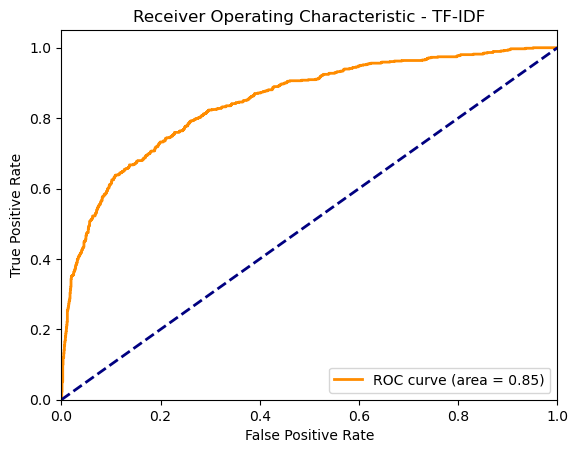

Classification Report for Sentence Transformers:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1496
           1       0.65      0.50      0.57       661

    accuracy                           0.77      2157
   macro avg       0.73      0.69      0.70      2157
weighted avg       0.76      0.77      0.76      2157

AUC for Sentence Transformers: 0.81


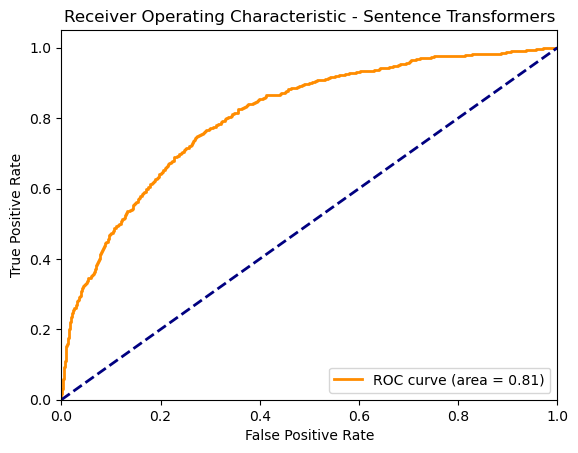

Classification Report for CLS_BERT:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1496
           1       0.66      0.52      0.58       661

    accuracy                           0.77      2157
   macro avg       0.73      0.70      0.71      2157
weighted avg       0.76      0.77      0.76      2157

AUC for CLS_BERT: 0.80


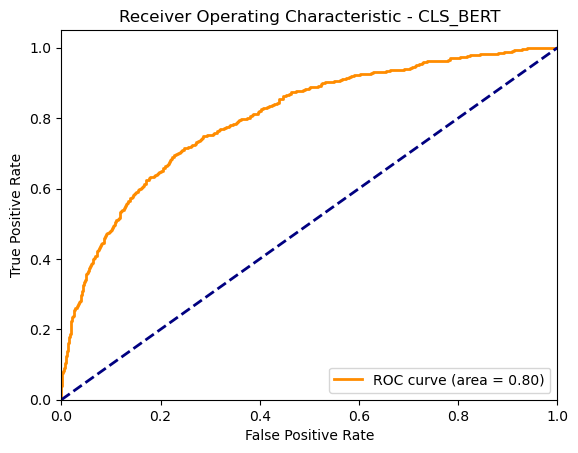

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def train_evaluate_and_plot(X_train, X_test, y_train, y_test, model_name):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    y_pred = clf.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"AUC for {model_name}: {roc_auc_score(y_test, y_pred_proba):.2f}")
    plot_roc_curve(y_test, y_pred_proba, model_name)

# TF-IDF
train_evaluate_and_plot(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")

# Sentence Transformers
train_evaluate_and_plot(X_train_st, X_test_st, y_train, y_test, "Sentence Transformers")

# CLS_BERT
train_evaluate_and_plot(X_train_cls_bert, X_test_cls_bert, y_train, y_test, "CLS_BERT")

###Support vector machines models

Below, there are 3 support vector machine models based on the word embeddings from chapter 5. Models have been tuned and cross-validated. 

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  13.6s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  13.2s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  13.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  15.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  15.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  15.5s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  13.5s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  13.2s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  13.3s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  15.7s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  15.7s
[CV] END ........................C=1, gamma=0.01,

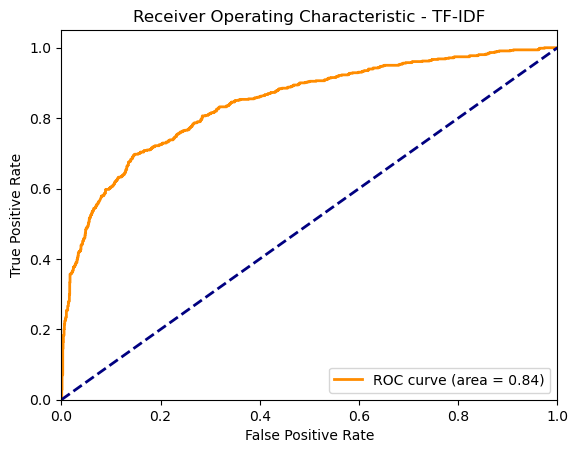

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  20.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  20.4s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  19.9s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  40.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  38.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  38.9s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  20.3s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  20.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  23.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  27.5s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  28.9s
[CV] END ........................C=1, gamma=0.01,

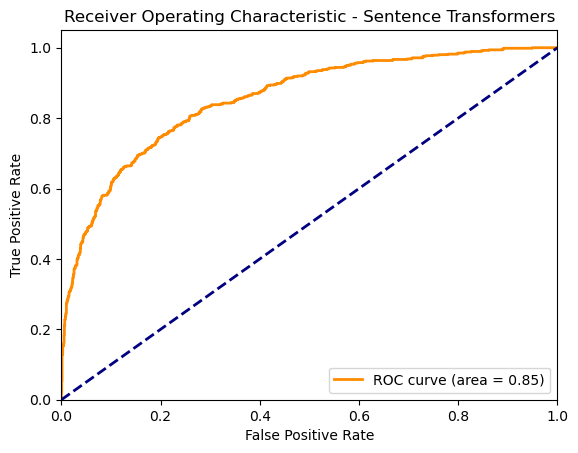

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.0min
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  59.4s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  56.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  53.6s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  53.4s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  55.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  52.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  51.9s
[CV] END ........................C=1, gamma=0.01,

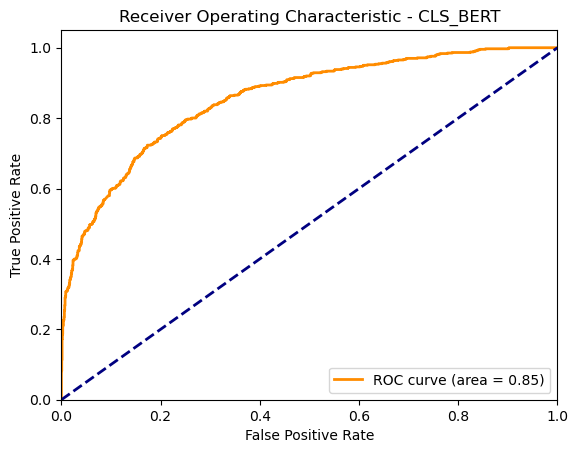

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

# Perform hyperparameter tuning using GridSearchCV
def tune_and_evaluate_svm(X_train, y_train, model_name):
    grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2, cv=3)
    grid.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_
    return best_model

# Train and evaluate SVM models with cross-validation
def train_evaluate_and_plot_svm(X_train, X_test, y_train, y_test, model_name):
    best_model = tune_and_evaluate_svm(X_train, y_train, model_name)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    y_pred = best_model.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"AUC for {model_name}: {roc_auc_score(y_test, y_pred_proba):.2f}")
    plot_roc_curve(y_test, y_pred_proba, model_name)

# TF-IDF
train_evaluate_and_plot_svm(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")

# Sentence Transformers
train_evaluate_and_plot_svm(X_train_st, X_test_st, y_train, y_test, "Sentence Transformers")

# CLS_BERT
train_evaluate_and_plot_svm(X_train_cls_bert, X_test_cls_bert, y_train, y_test, "CLS_BERT")

Highest F-1 scores were obtained for the SVM model trained with 3 folds with hyperparameter tuning basing on word embeddings from sentece transformers model. 